**Post Test - Self-Organizing Maps**

*Self-organizing maps* (SOM), atau yang disebut juga dengan
topology-preserving maps, adalah sebuah algoritma klasterisasi (clustering)
sehingga termasuk pada algoritma unsupervised learning.

#Kode (Jangan diubah)
Fungsi *self-organizing maps*

In [22]:
import numpy as np

def som(X, lrate, b, max_epoch, n_cluster):
    centroids = np.random.uniform(size=(n_cluster, len(X[0])))
    epoch = 0
    labels = []
    while epoch < max_epoch:
        for x in X:
            d = [sum((w - x) ** 2) for w in centroids]
            min = np.argmin(d)
            centroids[min] += lrate * (x - centroids[min])
        lrate *= b
        epoch += 1

    for x in X:
        d = [sum((w - x) ** 2) for w in centroids]
        min = np.argmin(d)
        labels.append(min)
    return centroids, labels

def draw(X, target, centroids):
    colors = 'rgbcmyk'
    for x, label in zip(X, target):
        plt.plot(x[0], x[1], colors[label] + '.')
    plt.plot(centroids[:, 0], centroids[:, 1], 'kx')

#Soal

Gunakan dataset "Mall_Customers.csv" yang telah dilampirkan

Terdapat data Mall Segentation yang berisikan data CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100). Pada data tersebut, akan dilakukan klasterisasi menjadi 3 klaster dengan:
1. learning rate=0.1, b=0.2, dan max_epoc=3


### a) Load data

In [23]:
import pandas as pd

from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers (1).csv


### b) Preprocess

In [24]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')

df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

print(df['Gender'].unique())
df.head()


[1 0]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### c) Klasterisasi

Data:
 [[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 

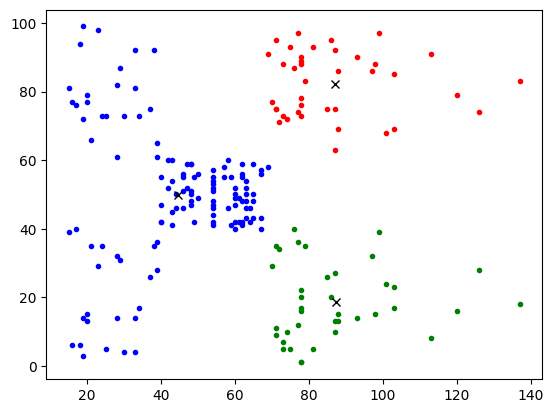

In [25]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
print('Data:\n', X)

lrate = 0.5
b = 0.9
max_epoch = 100
n_cluster = 3

centroids, labels = som(X, lrate=lrate, b=b, max_epoch=max_epoch, n_cluster=n_cluster)
print('Centroid terbaru:\n', centroids)

silhouette = silhouette_score(X, labels)
print('Silhouette score:', silhouette)

draw(X, labels, centroids)


Perbandingan Klasterisasi

Data:
 [[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 

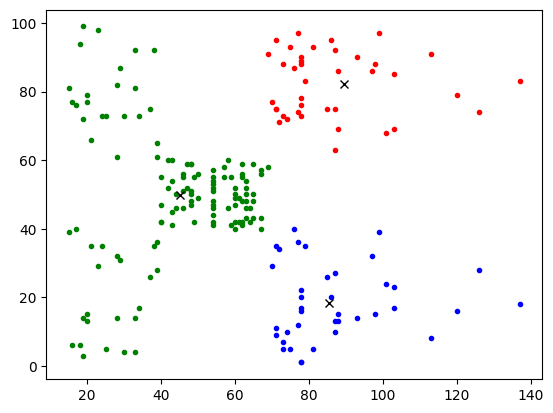

In [26]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
print('Data:\n', X)

best_score = -1
best_params = {}
for lrate in [0.3, 0.5, 0.7]:
    for b in [0.8, 0.9, 0.95]:
        for max_epoch in [50, 100, 200]:
            centroids, labels = som(X, lrate=lrate, b=b, max_epoch=max_epoch, n_cluster=3)
            silhouette = silhouette_score(X, labels)
            print(f'Parameters - lrate: {lrate}, b: {b}, max_epoch: {max_epoch} => Silhouette score: {silhouette}')

            if silhouette > best_score:
                best_score = silhouette
                best_params = {'lrate': lrate, 'b': b, 'max_epoch': max_epoch}

print('\nParameter terbaik berdasarkan Silhouette score:')
print(best_params)
print('Silhouette score terbaik:', best_score)

centroids, labels = som(X, lrate=best_params['lrate'], b=best_params['b'], max_epoch=best_params['max_epoch'], n_cluster=3)
draw(X, labels, centroids)


 Kita tidak menggunakan akurasi untuk menilai kinerja clustering, melainkan silhouette score. Silhouette score adalah metrik yang digunakan untuk menghitung seberapa baik pengelompokan/clustering. Nilainya berkisar antara -1 hingga 1. dengan detail sebagai berikut.

-  1: cluster berjauhan satu sama lain dan dapat dibedakan dengan jelas.

-  0 : Berarti cluster bersifat indifferent, atau dapat dikatakan jarak antar cluster tidak signifikan.

-  -1: Berarti cluster dikelompokkan dengan cara yang salah.

<br>

**Pertanyaan**

1. Carilah learning rate, b, dan max epoch yang sesuai dan menghasilkan hasil clustering yang cukup baik!

2. Bandingkan hasil yang didapatkan dan jelaskan apa pengaruh learning rate, b, dan max epoch yang dimasukkan!

JAWABAN
1. Untuk menentukan learning rate, bias (b), dan jumlah epoch maksimum yang optimal dalam algoritma clustering, pertama pilih algoritma yang sesuai, seperti K-Means. Persiapkan data dengan baik dan normalisasi jika diperlukan. Mulailah dengan learning rate antara 0.001 hingga 0.1,
2. Learning rate yang optimal membantu model belajar secara efektif, di mana nilai terlalu tinggi dapat menyebabkan fluktuasi dan nilai terlalu rendah dapat memperlambat pelatihan, menghasilkan cluster yang kabur atau tidak terdefinisi dengan baik. Bias, meskipun tidak selalu relevan dalam algoritma clustering tradisional, dapat meningkatkan fleksibilitas model dalam mempelajari pola jika digunakan dalam konteks jaringan saraf.